In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

titanic= pd.read_csv('C:/Users/sarav/Documents//titanic.csv')
titanic.shape
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
Survived = titanic['Survived'].value_counts().reset_index()
Survived

,Survived,count
0,0,549
1,1,342


<function matplotlib.pyplot.show(close=None, block=None)>

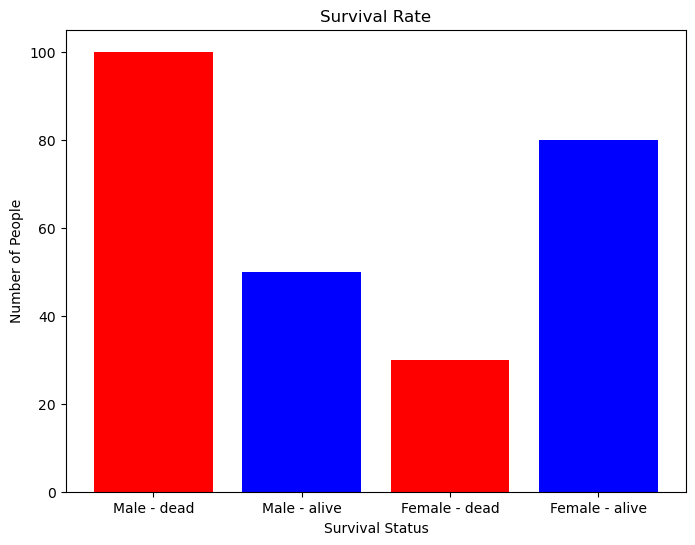

In [6]:
data = {'Survived': ['Male - dead', 'Male - alive', 'Female - dead', 'Female - alive'], 'Counts': [100, 50, 30, 80]} 
Survived = pd.DataFrame(data)

plt.figure(figsize=(8, 6))
plt.bar(Survived['Survived'], Survived['Counts'],color=["red","blue","red","blue"])
plt.xticks(Survived['Survived'])
plt.title('Survival Rate')
plt.xlabel('Survival Status')
plt.ylabel('Number of People')
plt.show

AgeGroup
Child          57.971014
Teenager       42.857143
Young Adult    33.333333
Adult          36.193029
Middle-aged    40.000000
Senior         22.727273
Name: Survived, dtype: float64


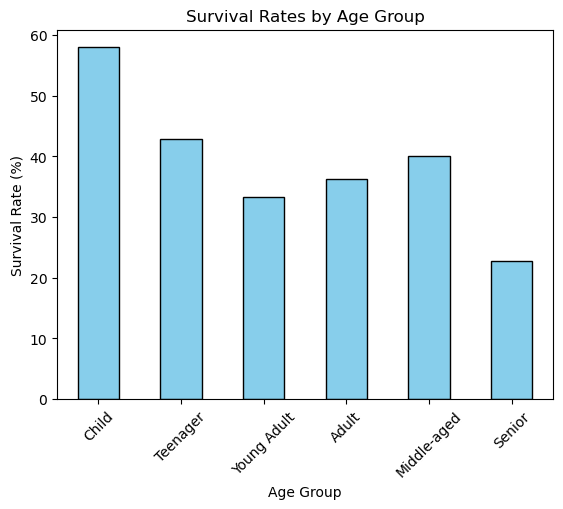

In [11]:
titanic= pd.read_csv('C:/Users/sarav/Documents//titanic.csv')
titanic['Age'].fillna(df['Age'].median(), inplace=True)
age_bins = [0, 12, 18, 25, 35, 60, 120]
age_labels = ['Child', 'Teenager', 'Young Adult', 'Adult', 'Middle-aged', 'Senior']
titanic['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)
survival_rates = df.groupby('AgeGroup', observed=False)['Survived'].mean() * 100
print(survival_rates)
survival_rates.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Survival Rates by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=45)
plt.show()

Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


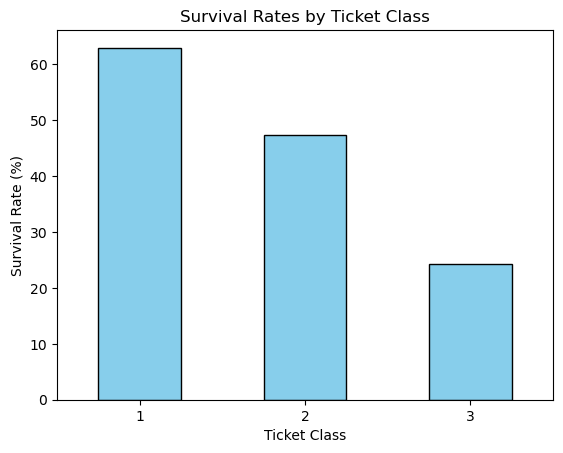

In [10]:
survival_rates = titanic.groupby('Pclass')['Survived'].mean() * 100
print(survival_rates)
survival_rates.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Survival Rates by Ticket Class')
plt.xlabel('Ticket Class')
plt.ylabel('Survival Rate (%)')
plt.xticks(rotation=0)
plt.show()

In [12]:
titanic= pd.read_csv('C:/Users/sarav/Documents//titanic.csv')
titanic['Age'].fillna(df['Age'].median(), inplace=True)
titanic['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
titanic['Fare'].fillna(df['Fare'].median(), inplace=True)
titanic.drop(['Cabin', 'Ticket', 'Name'], axis=1, inplace=True)
label = LabelEncoder()
titanic['Sex'] = label.fit_transform(df['Sex'])
titanic['Embarked'] = label.fit_transform(df['Embarked'])
titanic['FamilySize'] = df['SibSp'] + df['Parch'] + 1
titanic.drop(['SibSp', 'Parch'], axis=1, inplace=True)
X = titanic.drop(['PassengerId', 'Survived'], axis=1)
y = df['Survived']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
conf_matrix = confusion_matrix(y_val, y_pred)
class_report = classification_report(y_val, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8156424581005587
Confusion Matrix:
 [[89 16]
 [17 57]]
Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.85      0.84       105
           1       0.78      0.77      0.78        74

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

